In [1]:
import pandas as pd

# Membaca file Excel
file_path = "D:/Tazzaa/Kuliah/Semester 2/Statistik/Data Sales.csv"

# Membaca data dari Sheet1
df = pd.read_csv(file_path, encoding='windows-1252', delimiter=';')
print(df.head())


         Order ID     Month  Year           City    Segment         Category  \
0  CA-2014-156587     Maret  2014    DKI Jakarta   Consumer        Furniture   
1  CA-2014-156587     Maret  2014     Jawa Barat   Consumer  Office Supplies   
2  CA-2014-152905  Februari  2014         Banten   Consumer  Office Supplies   
3  CA-2014-156587     Maret  2014    Jawa Tengah   Consumer  Office Supplies   
4  CA-2014-157644  Desember  2014  DI Yogyakarta  Corporate       Technology   

  Sub-Category                                       Product Name       Sales  \
0       Chairs         Global Push Button Manager's Chair, Indigo   USD 48,71   
1      Storage            Carina 42"Hx23 3/4"W Media Storage Unit  USD 242,94   
2      Storage                                 Akro Stacking Bins   USD 12,62   
3          Art                                         Newell 330   USD 17,94   
4  Accessories  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   USD 34,77   

   Quantity     Profit  
0      

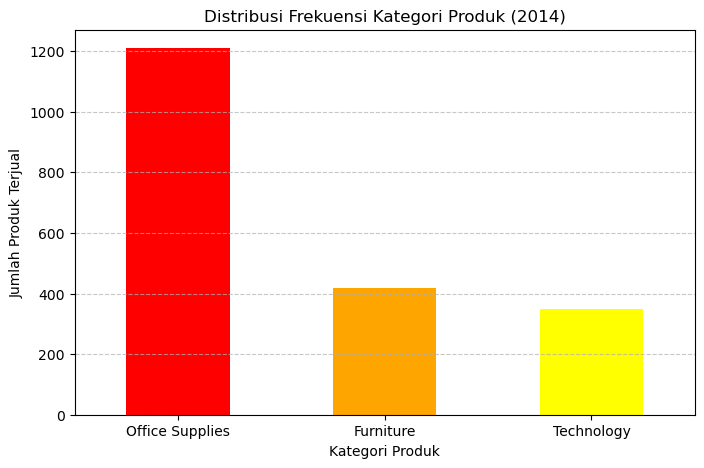

Category
Office Supplies    1210
Furniture           417
Technology          350
Name: count, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_2014 = df[df["Year"] == 2014]
category_counts = df_2014["Category"].value_counts()

plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color=["red", "orange", "yellow"])
plt.title("Distribusi Frekuensi Kategori Produk (2014)")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Produk Terjual")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(category_counts)

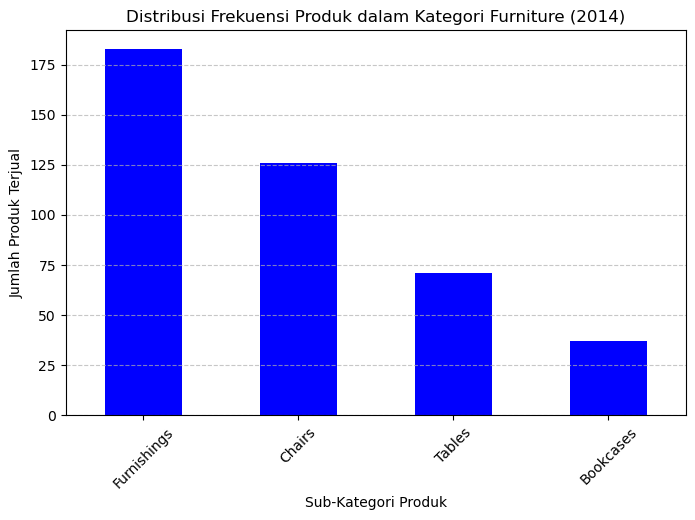

Sub-Category
Furnishings    183
Chairs         126
Tables          71
Bookcases       37
Name: count, dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_furniture = df_2014[df_2014["Category"] == "Furniture"]
furniture_counts = df_furniture["Sub-Category"].value_counts()

plt.figure(figsize=(8, 5))
furniture_counts.plot(kind="bar", color="blue")
plt.title("Distribusi Frekuensi Produk dalam Kategori Furniture (2014)")
plt.xlabel("Sub-Kategori Produk")
plt.ylabel("Jumlah Produk Terjual")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(furniture_counts)

In [2]:
import pandas as pd
df_tech = df[df["Category"] == "Technology"].copy()

# Perbaiki format angka di kolom Sales
df_tech["Sales"] = (
    df_tech["Sales"]
    .str.replace("USD ", "", regex=False)  # Hapus label "USD "
    .str.replace(".", "", regex=False)     # Hapus pemisah ribuan
    .str.replace(",", ".", regex=False)    # Ganti koma dengan titik untuk desimal
    .astype(float)  # Konversi ke float
)

# Mengelompokkan data berdasarkan produk dan menghitung total penjualan
top_tech_product = df_tech.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(1)

# Menampilkan produk dengan penjualan tertinggi
print(top_tech_product)

Product Name
Canon imageCLASS 2200 Advanced Copier    61599.83
Name: Sales, dtype: float64


In [3]:
import pandas as pd

# Filter data untuk Jakarta
df_jakarta = df[df["City"] == "DKI Jakarta"].copy()

# Membersihkan dan mengonversi kolom Sales menjadi float
df_jakarta["Sales"] = (
    df_jakarta["Sales"]
    .astype(str)  # Konversi ke string untuk menghindari error jika ada nilai NaN
    .str.replace("USD ", "", regex=False)  # Hapus label "USD "
    .str.replace(".", "", regex=False)  # Hapus pemisah ribuan
    .str.replace(",", ".", regex=False)  # Ganti koma dengan titik untuk desimal
    .str.strip()  # Hapus spasi ekstra jika ada
)

# Konversi ke float, gunakan errors='coerce' untuk menangani kesalahan
df_jakarta["Sales"] = pd.to_numeric(df_jakarta["Sales"], errors='coerce')

# Menghapus baris yang masih memiliki NaN setelah konversi
df_jakarta = df_jakarta.dropna(subset=["Sales"])

# Mengelompokkan total pembelian per tahun
sales_per_year = df_jakarta.groupby("Year")["Sales"].sum()

# Menampilkan hasil
print(sales_per_year)

Year
2014     87787.13
2015     62475.99
2016     83647.59
2017    114541.59
Name: Sales, dtype: float64


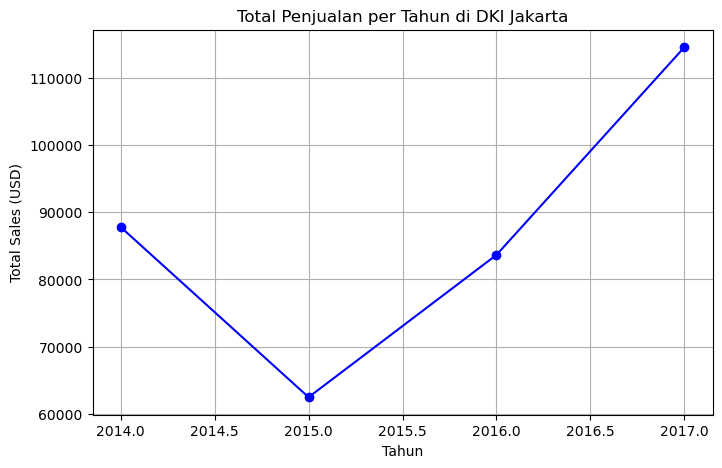

In [4]:
import matplotlib.pyplot as plt

# Membuat grafik
plt.figure(figsize=(8, 5))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o', linestyle='-', color='r')

# Menambahkan judul dan label
plt.title("Total Penjualan per Tahun di DKI Jakarta")
plt.xlabel("Tahun")
plt.ylabel("Total Sales (USD)")
plt.grid(True)

# Menampilkan grafik
plt.show()

In [5]:
df_2015_office = df[(df["Year"] == 2015) & (df["Category"] == "Office Supplies")]
total_purchases_2015 = len(df_2015_office)
corporate_purchases_2015 = len(df_2015_office[df_2015_office["Segment"] == "Corporate"])
probability_corporate = corporate_purchases_2015 / total_purchases_2015

print(f"Total transaksi Office Supplies 2015: {total_purchases_2015}")
print(f"Transaksi oleh Corporate: {corporate_purchases_2015}")
print(f"Peluang Corporate membeli Office Supplies: {probability_corporate:.2%}")

Total transaksi Office Supplies 2015: 1230
Transaksi oleh Corporate: 371
Peluang Corporate membeli Office Supplies: 30.16%
